# Financial Analysis in Python 

##### This is a small project on stocks data analysis and visualization in Python. We will work on Portfolio Asset Allocation and Statistical Data Analysis. Also, capital Asset Pricing Model, Monte Carlo Simulation and Portfolio Optimizarion is carried out. This project is built on the course project of Python and Machine Learning for financial Analysis in Udemy.

1. Data Analysis: Numpy, Pandas
2. Data visualization: Seaborn, Matplotlib and Plotly

1. Data Analysis and Visulaisation

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [2]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the stock data csv file, here's the list of the stocks considered:

# AAPL = Apple Stock 
# BA = Boeing 
# T = AT&T
# MGM = MGM Resorts International (Hotel Industry)
# AMZN = Amazon
# IBM = IBM
# TSLA = Tesla Motors
# GOOG = Google 
# sp500 = US Stock Market (S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on U.S. stock exchange)

stocks_df = pd.read_csv('/content/drive/My Drive/Financial Analysis/stock.csv')
stocks_df

Date        AAPL          BA  ...         TSLA         GOOG        sp500
0     2012-01-12   60.198570   75.510002  ...    28.250000   313.644379  1295.500000
1     2012-01-13   59.972858   74.599998  ...    22.790001   311.328064  1289.089966
2     2012-01-17   60.671429   75.239998  ...    26.600000   313.116364  1293.670044
3     2012-01-18   61.301430   75.059998  ...    26.809999   315.273285  1308.040039
4     2012-01-19   61.107143   75.559998  ...    26.760000   318.590851  1314.500000
...          ...         ...         ...  ...          ...          ...          ...
2154  2020-08-05  440.250000  174.279999  ...  1485.020020  1473.609985  3327.770020
2155  2020-08-06  455.609985  172.199997  ...  1489.579956  1500.099976  3349.159912
2156  2020-08-07  444.450012  170.020004  ...  1452.709961  1494.489990  3351.280029
2157  2020-08-10  450.910004  179.410004  ...  1418.569946  1496.099976  3360.469971
2158  2020-08-11  437.500000  180.130005  ...  1374.390015  1480.319946  3333.689941

[2159 rows x 10 columns]

In [5]:
# Sort the stock data by date
stocks_df = stocks_df.sort_values(by = 'Date')
stocks_df

Date        AAPL          BA  ...         TSLA         GOOG        sp500
0     2012-01-12   60.198570   75.510002  ...    28.250000   313.644379  1295.500000
1     2012-01-13   59.972858   74.599998  ...    22.790001   311.328064  1289.089966
2     2012-01-17   60.671429   75.239998  ...    26.600000   313.116364  1293.670044
3     2012-01-18   61.301430   75.059998  ...    26.809999   315.273285  1308.040039
4     2012-01-19   61.107143   75.559998  ...    26.760000   318.590851  1314.500000
...          ...         ...         ...  ...          ...          ...          ...
2154  2020-08-05  440.250000  174.279999  ...  1485.020020  1473.609985  3327.770020
2155  2020-08-06  455.609985  172.199997  ...  1489.579956  1500.099976  3349.159912
2156  2020-08-07  444.450012  170.020004  ...  1452.709961  1494.489990  3351.280029
2157  2020-08-10  450.910004  179.410004  ...  1418.569946  1496.099976  3360.469971
2158  2020-08-11  437.500000  180.130005  ...  1374.390015  1480.319946  3333.689941

[2159 rows x 10 columns]

In [6]:
# Print out the number of stocks
print("Number of stocks available is {}".format(len(stocks_df.columns[1:])))

Number of stocks available is 9


In [7]:
# Print the name of stocks
for stock in stocks_df.columns[1:]:
  print(stock)

AAPL
BA
T
MGM
AMZN
IBM
TSLA
GOOG
sp500


In [8]:
stocks_df.describe()

AAPL           BA  ...         GOOG        sp500
count  2159.000000  2159.000000  ...  2159.000000  2159.000000
mean    140.819823   189.942700  ...   783.712512  2218.749554
std      70.827601   103.678586  ...   334.448057   537.321727
min      55.790001    67.239998  ...   278.481171  1278.040039
25%      89.165714   124.015000  ...   527.214416  1847.984985
50%     116.599998   142.419998  ...   737.599976  2106.629883
75%     175.019997   297.044998  ...  1079.744995  2705.810059
max     455.609985   440.619995  ...  1568.489990  3386.149902

[8 rows x 9 columns]

In [9]:
# Check if data contains any null values
stocks_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [10]:
# Getting dataframe info
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [11]:
# This function performs data visualization, taking in a dataframe df as an input argument and does not return anything back.

def show_plot(df, fig_title):
  df.plot(x = 'Date', figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()


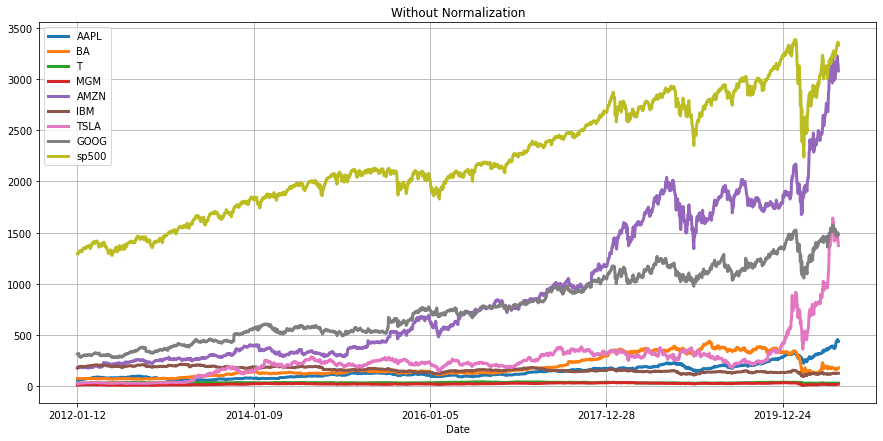

In [12]:
# Plot the data. Here the stock values are not normalized
show_plot(stocks_df, "Without Normalization")

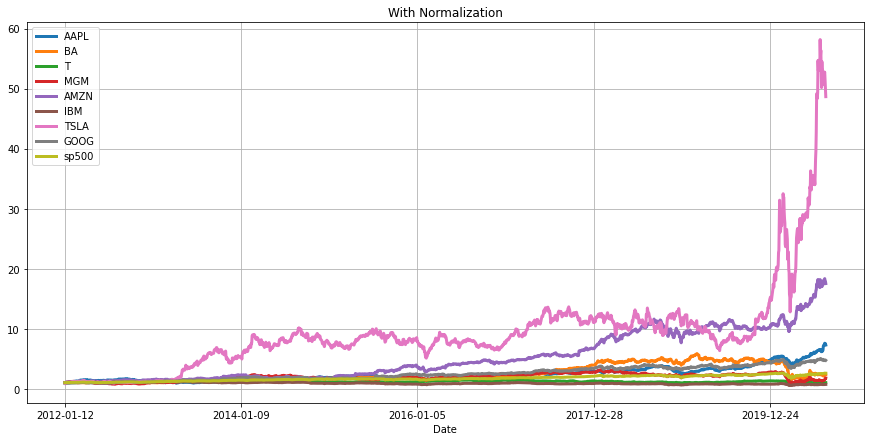

In [13]:
# Normalization is carried out to check how much the stock value has changed with respect to the day 1.
# It is carried by dividing each element of a stock with its first element.

def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x


show_plot(normalize(stocks_df), "With Normalization")

In [14]:
# This Function performs an interactive data plotting, using plotly express
# Plotly.express module which is imported as px includes functions that can plot interactive plots easily and effectively. 

def interactive_plot(df, title):
  fig = px.line(title = title)
  
  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i) # add a new Scatter trace

  fig.show()

In [16]:
# Plotting interactive chart (Without Normalization)
interactive_plot(stocks_df, 'Prices')

In [17]:
# Interactive Plotting : Normalized values
interactive_plot(normalize(stocks_df), 'Prices')

In [18]:
# Calculating daily return for a single security for example lets take the S&P500 

df = stocks_df['sp500']

# Define a dataframe names df_daily_return 
df_daily_return = df.copy()

#Loop through every element in the dataframe
for j in range(1, len(df)):

  # Calculate the percentage of change from the previous day
  df_daily_return[j] = ((df[j]- df[j-1])/df[j-1]) * 100

# put zero in the first line item
df_daily_return[0] = 0
df_daily_return

0       0.000000
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2154    0.642974
2155    0.642770
2156    0.063303
2157    0.274222
2158   -0.796913
Name: sp500, Length: 2159, dtype: float64

In [19]:
#  A function to calculate stocks daily returns (for all stocks) 
def daily_return(df):
  df_daily_return = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    
    # Loop through each row belonging to the stock
    for j in range(1, len(df)):

      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    # set the value of first row to zero since the previous value is not available
    df_daily_return[i][0] = 0
  
  return df_daily_return

In [20]:
# Get the daily returns for all stocks
stocks_daily_return = daily_return(stocks_df)

In [21]:
stocks_daily_return

Date      AAPL        BA  ...       TSLA      GOOG     sp500
0     2012-01-12  0.000000  0.000000  ...   0.000000  0.000000  0.000000
1     2012-01-13 -0.374946 -1.205144  ... -19.327430 -0.738516 -0.494792
2     2012-01-17  1.164812  0.857909  ...  16.717854  0.574410  0.355295
3     2012-01-18  1.038382 -0.239234  ...   0.789470  0.688856  1.110793
4     2012-01-19 -0.316937  0.666134  ...  -0.186494  1.052283  0.493866
...          ...       ...       ...  ...        ...       ...       ...
2154  2020-08-05  0.362467  5.579446  ...  -0.133153  0.589774  0.642974
2155  2020-08-06  3.488923 -1.193483  ...   0.307062  1.797626  0.642770
2156  2020-08-07 -2.449458 -1.265966  ...  -2.475194 -0.373974  0.063303
2157  2020-08-10  1.453480  5.522880  ...  -2.350092  0.107728  0.274222
2158  2020-08-11 -2.973987  0.401316  ...  -3.114399 -1.054744 -0.796913

[2159 rows x 10 columns]

In [22]:
# Daily Return Correlation
cm = stocks_daily_return.drop(columns = ['Date']).corr()

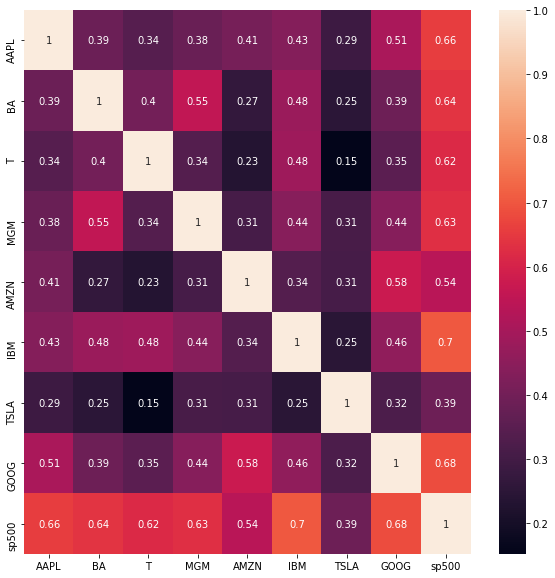

In [23]:
# Correlation can be best viewed with Heat maps

plt.figure(figsize=(10, 10))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax);

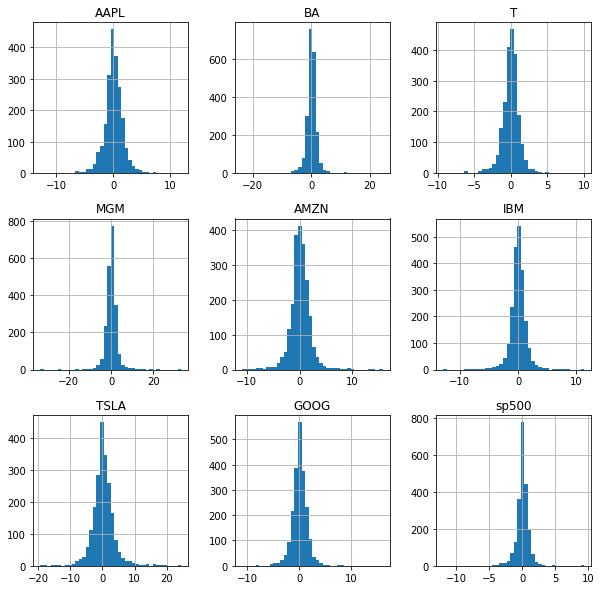

In [24]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 
stocks_daily_return.hist(figsize=(10, 10), bins = 40);

2. Portfolio Asset Allocation and Statistical Data Analysis.
  Normally Portfolio includes assets, fixed income securities (bonds), Exchange Traded Funds (ETL), cash Mutual funds etc. We will see about Project Asset Allocation

Performing Random Asset Allocation

In [25]:
# Let's create random portfolio weights. Portfolio weights must sum to 1 

# Set random seed
np.random.seed()

# Create random weights for the stocks and normalize them
weights = np.array(np.random.random(9))

# Ensure that the sum of all weights are = 1
weights = weights / np.sum(weights) 
print(weights)

[0.06073719 0.00063837 0.0962758  0.15212227 0.26419488 0.17950574
 0.02460532 0.19258413 0.02933629]


In [26]:
# Lets assume we have $1,000,000 to be invested and we will allocate this fund based on the weights of the stocks
# We will create a function that takes in the stock prices along with the weights and retun:
# (1) Daily value of each individual securuty in $ over the specified time period
# (2) Overall daily worth of the entire portfolio 
# (3) Daily return 

def portfolio_allocation(df, weights):

  df_portfolio = df.copy()
  
  # Normalize the stock avalues 
  df_portfolio = normalize(df_portfolio)
  
  for counter, stock in enumerate(df_portfolio.columns[1:]):
    df_portfolio[stock] = df_portfolio[stock] * weights[counter]
    df_portfolio[stock] = df_portfolio[stock] * 1000000

  df_portfolio['portfolio daily worth in $'] = df_portfolio.loc[:, 'AAPL':'sp500'].sum(axis = 1)
  
  df_portfolio['portfolio daily % return'] = 0.0000

  for i in range(1, len(stocks_df)):
    
    # Calculate the percentage of change from the previous day
    df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100 
  
  # set the value of first row to zero, as previous value is not available
  df_portfolio['portfolio daily % return'][0] = 0
  return df_portfolio

In [30]:
df_portfolio = portfolio_allocation(stocks_df, weights)
df_portfolio

Date  ...  portfolio daily % return
0     2012-01-12  ...                  0.000000
1     2012-01-13  ...                 -0.160193
2     2012-01-17  ...                  1.026882
3     2012-01-18  ...                  2.130499
4     2012-01-19  ...                  0.979503
...          ...  ...                       ...
2154  2020-08-05  ...                  1.326797
2155  2020-08-06  ...                  1.113345
2156  2020-08-07  ...                 -1.572844
2157  2020-08-10  ...                 -0.193766
2158  2020-08-11  ...                 -2.097528

[2159 rows x 12 columns]

In [31]:
# Plot the portfolio daily return
fig = px.line(x = df_portfolio.Date, y = df_portfolio['portfolio daily % return'], title = 'Portfolio Daily % Return')
fig.show()

In [32]:
# Plot all stocks (normalized)
interactive_plot(df_portfolio.drop(['portfolio daily worth in $', 'portfolio daily % return'], axis = 1), 'Portfolio individual stocks worth in $ over time')

In [33]:
# Print out a histogram of daily returns
fig = px.histogram(df_portfolio, x = 'portfolio daily % return')
fig.show()

In [34]:
# Plotting portfolio daily worth over time
fig = px.line(title = 'portfolio daily worth over time')
# Loop through each stock (while ignoring time columns with index 0)
fig.add_scatter(x = df_portfolio['Date'], y = df_portfolio['portfolio daily worth in $'], name = 'portfolio daily worth over time') # add a new Scatter trace
fig.show()


In [ ]:
# Calculating Portfolio Statistical Metrics 

In [35]:
# Cummulative return of the portfolio (Note that we now look for the last net worth of the portfolio compared to it's start value)
cummulative_return = ((df_portfolio['portfolio daily worth in $'][-1:] - df_portfolio['portfolio daily worth in $'][0])/ df_portfolio['portfolio daily worth in $'][0]) * 100
print('Cummulative return of the portfolio is {} %'.format(cummulative_return.values[0]))


Cummulative return of the portfolio is 674.2883739064137 %


In [36]:
# Calculate the portfolio standard deviation
print('Standard deviation of the portfolio is {}'.format(df_portfolio['portfolio daily % return'].std()))

Standard deviation of the portfolio is 1.418796657113221


In [37]:
# Calculate the average daily return 
print('Standard deviation of the portfolio is {}'.format(df_portfolio['portfolio daily % return'].mean()))

Standard deviation of the portfolio is 0.10492344445561608


In [38]:
# Portfolio sharpe ratio(average return earned in excess of risk free rate)
sharpe_ratio = df_portfolio['portfolio daily % return'].mean() / df_portfolio['portfolio daily % return'].std() * np.sqrt(252)
print('Sharpe ratio of the portfolio is {}'.format(sharpe_ratio))

Sharpe ratio of the portfolio is 1.173958252599856


3. Capital Asset Pricing Model

In [39]:
# Function to calculate the daily returns 
def daily_return(df):

  df_daily_return = df.copy()
  
  # Loop through each stock
  for i in df.columns[1:]:
    
    # Loop through each row belonging to the stock
    for j in range(1, len(df)):
      
      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    # set the value of first row to zero, as previous value is not available
    df_daily_return[i][0] = 0
  return df_daily_return

In [40]:
# Get the daily returns 
stocks_daily_return = daily_return(stocks_df)
stocks_daily_return

Date      AAPL        BA  ...       TSLA      GOOG     sp500
0     2012-01-12  0.000000  0.000000  ...   0.000000  0.000000  0.000000
1     2012-01-13 -0.374946 -1.205144  ... -19.327430 -0.738516 -0.494792
2     2012-01-17  1.164812  0.857909  ...  16.717854  0.574410  0.355295
3     2012-01-18  1.038382 -0.239234  ...   0.789470  0.688856  1.110793
4     2012-01-19 -0.316937  0.666134  ...  -0.186494  1.052283  0.493866
...          ...       ...       ...  ...        ...       ...       ...
2154  2020-08-05  0.362467  5.579446  ...  -0.133153  0.589774  0.642974
2155  2020-08-06  3.488923 -1.193483  ...   0.307062  1.797626  0.642770
2156  2020-08-07 -2.449458 -1.265966  ...  -2.475194 -0.373974  0.063303
2157  2020-08-10  1.453480  5.522880  ...  -2.350092  0.107728  0.274222
2158  2020-08-11 -2.973987  0.401316  ...  -3.114399 -1.054744 -0.796913

[2159 rows x 10 columns]

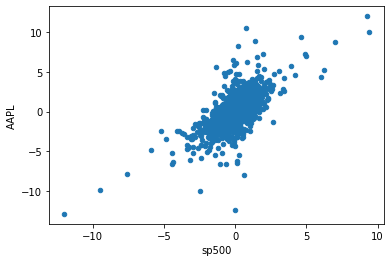

In [41]:
# plot a scatter plot between the selected stock and the S&P500 (Market)
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

In [43]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)
# beta represents the slope of the line regression line (market return vs. stock return). 
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500) 
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets 
# Beta = 1.0, this indicates that its price activity is strongly correlated with the market. 
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. 


beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['AAPL'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('AAPL', beta, alpha))  

Beta for AAPL stock is = 1.1128924148678099 and alpha is = 0.052812084694402864


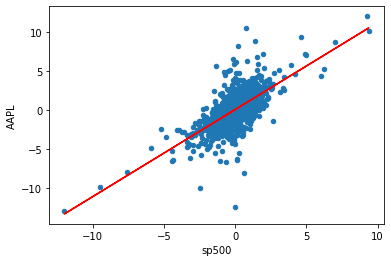

In [44]:
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r')


In [45]:
beta_tesla, alpha_tesla = np.polyfit(stocks_daily_return['TSLA'], stocks_daily_return['T'], 1)
beta_tesla

0.05624110041239006

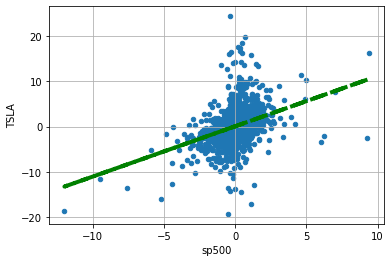

In [46]:
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'TSLA')
plt.plot(stocks_daily_return['sp500'], beta*stocks_daily_return['sp500'] + alpha, color='green', linestyle='dashed', linewidth=4)
plt.grid()
plt.show()

In [47]:
beta

1.1128924148678099

In [48]:
# Let's calculate the average daily rate of return for S&P500
stocks_daily_return['sp500'].mean()

0.049316006600389206

In [49]:
# Let's calculate the annualized rate of return for S&P500 
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday) 
rm = stocks_daily_return['sp500'].mean() * 252
rm

12.42763366329808

In [50]:
# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate
rf = 0 

# Calculate return for any security (APPL) using CAPM  
ER_AAPL = rf + ( beta * (rm-rf) ) 

In [51]:
ER_AAPL

13.830619238640287

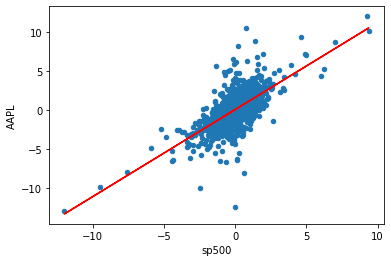

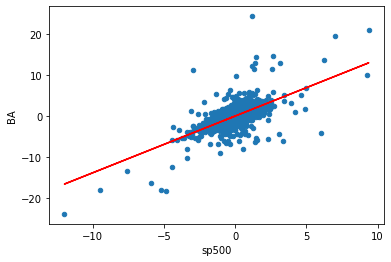

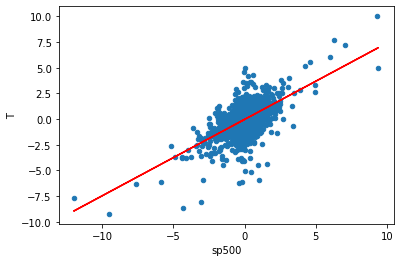

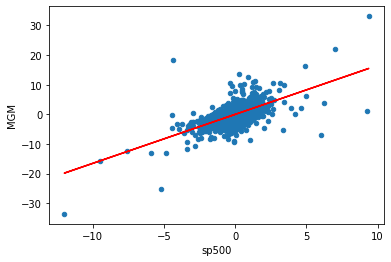

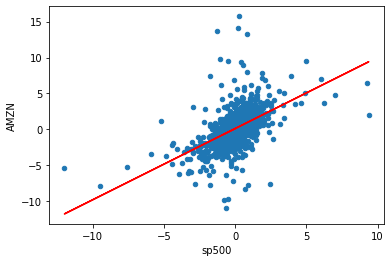

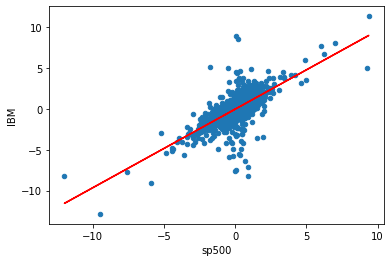

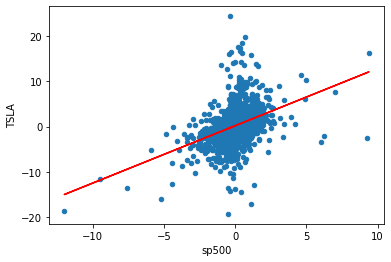

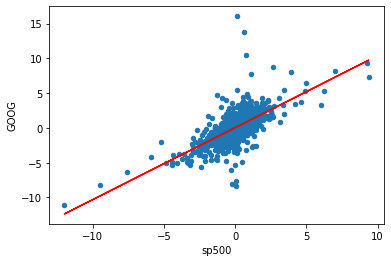

In [52]:
beta = {}
alpha = {}

# Loop on every stock daily return
for i in stocks_daily_return.columns:

  # Ignoring the date and S&P500 Columns 
  if i != 'Date' and i != 'sp500':
    # plot a scatter plot between each individual stock and the S&P500 (Market)
    stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = i)
    
    # Fit a polynomial between each stock and the S&P500 (Poly with order = 1 is a straight line)
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    
    plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color = 'r')
    
    beta[i] = b
    
    alpha[i] = a
    
    plt.show()

In [53]:
beta

{'AAPL': 1.1128924148678099,
 'AMZN': 0.9917345712576846,
 'BA': 1.3828672010892775,
 'GOOG': 1.034881768742856,
 'IBM': 0.9604149148095245,
 'MGM': 1.653567706518011,
 'T': 0.7446293454747844,
 'TSLA': 1.2686150101095908}

In [54]:
# Alpha describes the strategy's ability to beat the market (S&P500)
# Alpha indicates the “excess return” or “abnormal rate of return,” 

alpha

{'AAPL': 0.052812084694402864,
 'AMZN': 0.1022139641776522,
 'BA': -0.0022906983297531543,
 'GOOG': 0.03335558721467005,
 'IBM': -0.053454941504451084,
 'MGM': -0.016885305520478674,
 'T': -0.028563430198461616,
 'TSLA': 0.1758349216516583}

In [55]:
# Let's do the same plots but in an interactive way
for i in stocks_daily_return.columns:
  
  if i != 'Date' and i != 'sp500':
    
    # Use plotly express to plot the scatter plot for every stock vs. the S&P500
    fig = px.scatter(stocks_daily_return, x = 'sp500', y = i, title = i)

    # Fit a straight line to the data and obtain beta and alpha
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    
    # Plot the straight line 
    fig.add_scatter(x = stocks_daily_return['sp500'], y = b*stocks_daily_return['sp500'] + a)
    fig.show()

In [56]:
# APPLY CAPM FORMULA TO CALCULATE THE RETURN FOR THE PORTFOLIO

In [57]:
# Obtain a list of all stock names
keys = list(beta.keys())
keys

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']

In [58]:
# Define the expected return dictionary
ER = {}

rf = 0 # assume risk free rate is zero in this case
rm = stocks_daily_return['sp500'].mean() * 252 # this is the expected return of the market 
rm

12.42763366329808

In [59]:
for i in keys:
  # Calculate return for every security using CAPM  
  ER[i] = rf + ( beta[i] * (rm-rf) ) 

In [60]:
for i in keys:
  print('Expected Return Based on CAPM for {} is {}%'.format(i, ER[i]))

Expected Return Based on CAPM for AAPL is 13.830619238640287%
Expected Return Based on CAPM for BA is 17.1857669801279%
Expected Return Based on CAPM for T is 9.253980720502046%
Expected Return Based on CAPM for MGM is 20.54993369406583%
Expected Return Based on CAPM for AMZN is 12.324913942818489%
Expected Return Based on CAPM for IBM is 11.935684726020403%
Expected Return Based on CAPM for TSLA is 15.765882605403183%
Expected Return Based on CAPM for GOOG is 12.861131506762176%
